# Lab 1 - Linear Regression
Name: Yadu Krishnan Madhu
Section: 10
Student Number: 500975010

### Without Standardization

Python functions

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression

def mean(dataset) -> float:
    avg = 0
    for num in dataset:
        avg += num
    return avg / len(dataset)

def std(dataset, mean: float) -> float:
    std = 0
    for num in dataset:
        std += (num - mean) ** 2
    return math.sqrt(std / (len(dataset) - 1))

def standardize(x: int, mean: float, std: float) -> float:
    return float((x - mean) / std)

def cost_function(y, m: float, x, b: float, n: int) -> float:
    err = 0.0
    for i in range(n):
        err += (y[i] - ((m * x[i]) + b)) ** 2
    return float(err/n)

def m_grad(y, m: float, x, b: float, n: int) -> int:
    m_grad = 0
    for i in range(n):
        m_grad += - x[i] * (y[i] - (m * x[i] + b))
    return int((2 * m_grad) / n)

def b_grad(y, m: float, x, b: float, n: int) -> int:
    b_grad = 0
    for i in range(n):
        b_grad += - (y[i] - (m * x[i] + b))
    return int((2 * b_grad) / n)

def update_grad(x: float, alpha: float, grad: float) -> float:
    return x - (alpha * grad)

# def update_m_b(m: int, b: int, iterations: int, alpha: int) -> ():
#     m = m
#     b = b
#     for i in range(iterations):
#         m = update_grad(m, alpha, m_grad(final_marks, m, midterm_marks, b, len(midterm_marks)))
#         b = update_grad(b, alpha, b_grad(final_marks, b, midterm_marks, b, len(midterm_marks)))
#     return (m, b)

C:\Users\yadu\AppData\Local\Temp\ipykernel_16636\2345801108.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Initializating m, b and $\alpha$ values

In [3]:
m = -0.5
b = 0
alpha = 0.0001

Displaying data points from the data set

Text(0.5, 1.0, 'Midterm Marks vs Final Marks')

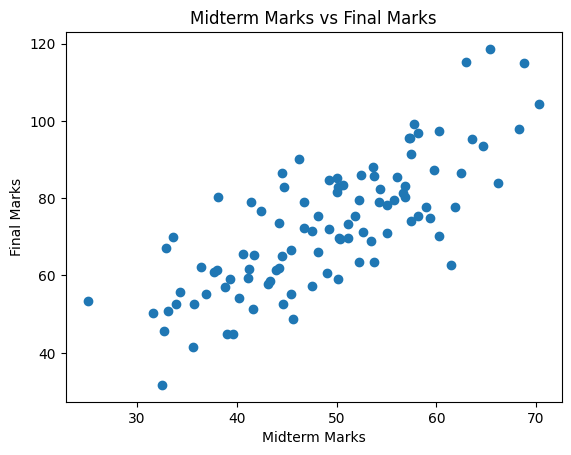

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/student_marks.csv')
global midterm_marks
global final_marks
midterm_marks = data['Midterm mark']
final_marks = data['Final mark']

plt.scatter(midterm_marks, final_marks)
plt.xlabel('Midterm Marks')
plt.ylabel('Final Marks')
plt.title('Midterm Marks vs Final Marks')

Displaying the initial regression line

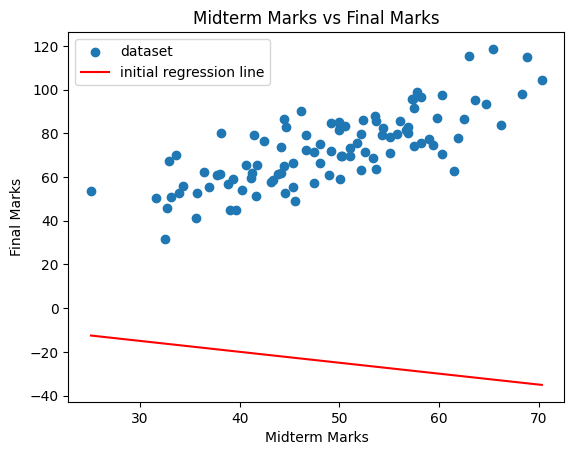

In [5]:
plt.scatter(midterm_marks, final_marks)
plt.xlabel('Midterm Marks')
plt.ylabel('Final Marks')
plt.title('Midterm Marks vs Final Marks')

x_values = np.linspace(min(midterm_marks), max(midterm_marks), 100)
plt.plot(x_values, x_values * -0.5, 'r')  # inital regression line
plt.legend(["dataset", "initial regression line"])

Updating m and b a 100 times
Displaying updated linear regression line

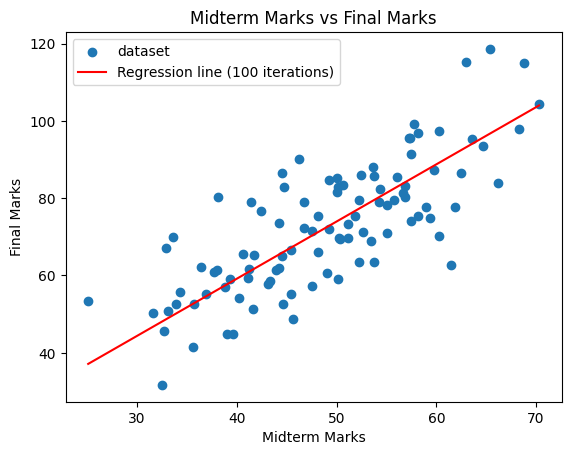

In [6]:
for i in range(100):
    m = update_grad(m, alpha, m_grad(final_marks, m, midterm_marks, b, len(midterm_marks)))
    b = update_grad(b, alpha, b_grad(final_marks, m, midterm_marks, b, len(midterm_marks)))


plt.scatter(midterm_marks, final_marks)
plt.xlabel('Midterm Marks')
plt.ylabel('Final Marks')
plt.title('Midterm Marks vs Final Marks')

x_values = np.linspace(min(midterm_marks), max(midterm_marks), 100)
plt.plot(x_values, x_values * m + b, 'r')  # inital regression line
plt.legend(["dataset", "Regression line (100 iterations)"])

Error Graph at each iteration (From 1 to 100)

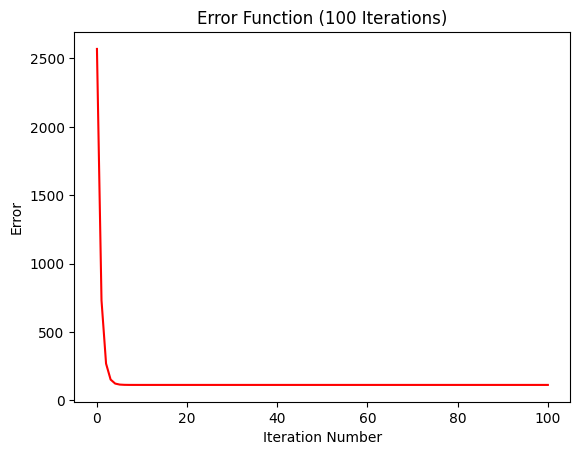

In [7]:
error_points = []

m = -0.5
b = 0
alpha = 0.0001

for i in range(100):
    m = update_grad(m, alpha, m_grad(final_marks, m, midterm_marks, b, len(midterm_marks)))
    b = update_grad(b, alpha, b_grad(final_marks, m, midterm_marks, b, len(midterm_marks)))
    error_points.append(cost_function(final_marks, m, midterm_marks, b, len(midterm_marks)))


plt.xlabel('Iteration Number')
plt.ylabel('Error')
plt.title('Error Function (100 Iterations)')

x_values = np.linspace(0, 100, 100)
plt.plot(x_values, error_points, 'r')  # inital regression line


Updating b and m 2000 times


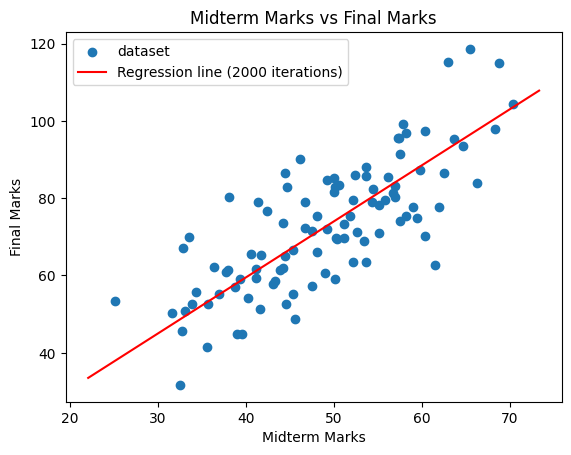

In [8]:
m = -0.5
b = 0
alpha = 0.0001

for i in range(2000):
    m = update_grad(m, alpha, m_grad(final_marks, m, midterm_marks, b, len(midterm_marks)))
    b = update_grad(b, alpha, b_grad(final_marks, b, midterm_marks, b, len(midterm_marks)))


plt.scatter(midterm_marks, final_marks)
plt.xlabel('Midterm Marks')
plt.ylabel('Final Marks')
plt.title('Midterm Marks vs Final Marks')

x_values = np.linspace(min(midterm_marks) - 3, max(midterm_marks) + 3, 100)
plt.plot(x_values, x_values * m + b, 'r')  # inital regression line
plt.legend(["dataset", "Regression line (2000 iterations)"])

Error graph for 2000 iterations

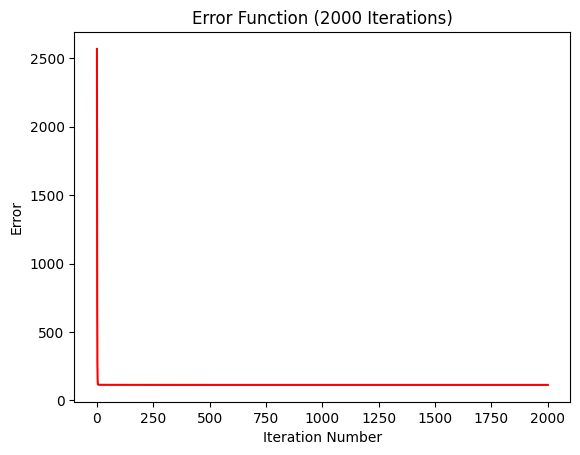

In [9]:
error_points = []

m = -0.5
b = 0
alpha = 0.0001

for i in range(2000):    
    m = update_grad(m, alpha, m_grad(final_marks, m, midterm_marks, b, len(midterm_marks)))
    b = update_grad(b, alpha, b_grad(final_marks, b, midterm_marks, b, len(midterm_marks)))
    error_points.append(cost_function(final_marks, m, midterm_marks, b, len(midterm_marks)))

plt.xlabel('Iteration Number')
plt.ylabel('Error')
plt.title('Error Function (2000 Iterations)')

x_values = np.linspace(0, 2000, 2000)
plt.plot(x_values, error_points, 'r')  # inital regression line

Verifying Results using Sklearn

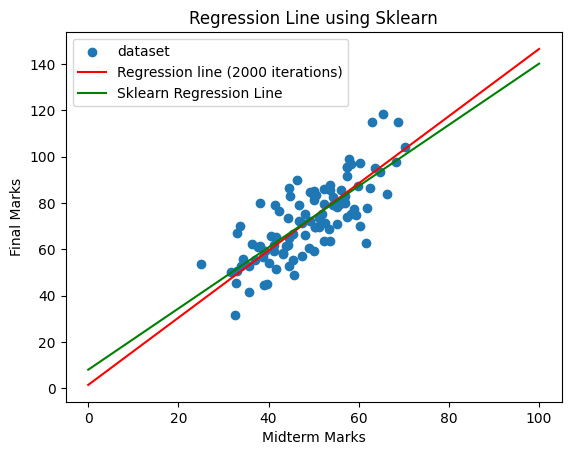

In [10]:
reg = LinearRegression()

# print(min(std_final_marks))

prediction_space = np.linspace(0, 100 , 100).reshape(-1, 1)

x = np.array(midterm_marks).reshape(-1, 1)
y = np.array(final_marks).reshape(-1, 1)

x_values = np.linspace(0, 100, 100)

reg.fit(x, y)
y_pred = reg.predict(prediction_space)

plt.scatter(midterm_marks,final_marks)
plt.xlabel('Midterm Marks')
plt.ylabel('Final Marks')
plt.title("Regression Line using Sklearn")
plt.plot(x_values, x_values * m + b, 'r')  # inital regression line
plt.plot(prediction_space, y_pred, color='green')
plt.legend(["dataset", "Regression line (2000 iterations)", "Sklearn Regression Line"])

### With Standardization


initialize m, b and $\alpha$

In [11]:
m = -0.5
b = 0
alpha = 0.0001

Graph with standardized data points

Text(0.5, 1.0, 'Midterm Marks vs Final Marks (Standardized)')

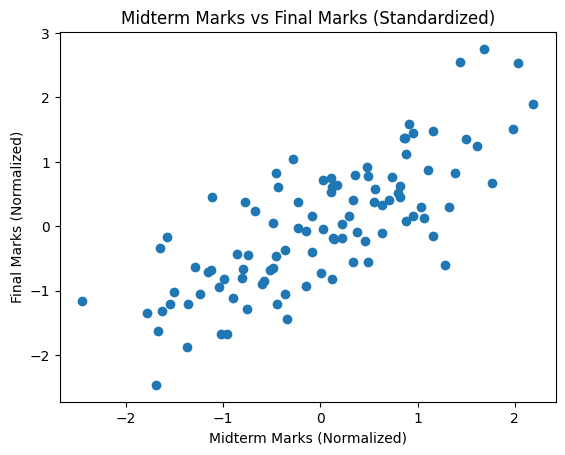

In [12]:
std_midterm_marks = []
midterm_mean = mean(midterm_marks)
midterm_std = std(midterm_marks, midterm_mean)

std_final_marks = []
final_mean = mean(final_marks)
final_std = std(final_marks, final_mean)

for i in range(len(midterm_marks)):
    std_midterm_marks.append(standardize(midterm_marks[i], midterm_mean, midterm_std))
    std_final_marks.append(standardize(final_marks[i], final_mean, final_std))

    
plt.scatter(std_midterm_marks, std_final_marks)
plt.xlabel('Midterm Marks (Normalized)')
plt.ylabel('Final Marks (Normalized)')
plt.title('Midterm Marks vs Final Marks (Standardized)')

Graph with standardized points and initial regression line

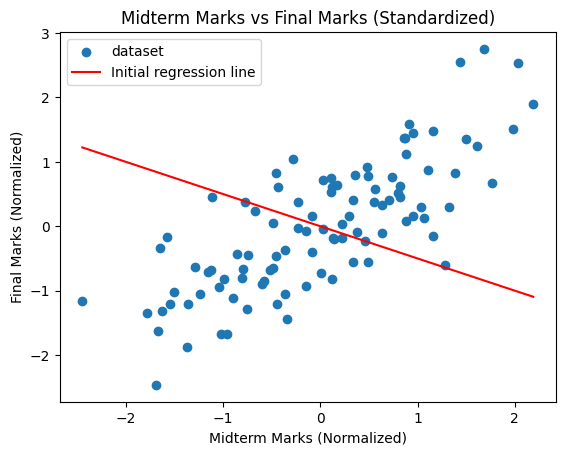

In [13]:
plt.scatter(std_midterm_marks, std_final_marks)
plt.xlabel('Midterm Marks (Normalized)')
plt.ylabel('Final Marks (Normalized)')
plt.title('Midterm Marks vs Final Marks (Standardized)')

x_values = np.linspace(min(std_midterm_marks), max(std_midterm_marks), 100)
plt.plot(x_values, x_values * -0.5, 'r')  # inital regression line
plt.legend(["dataset", "Initial regression line"])

Updating m and b a 100 times and displaying graph

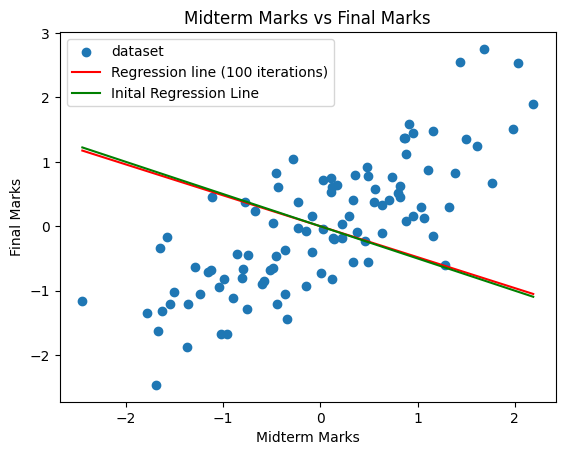

In [14]:
m = -0.5
b = 0
alpha = 0.0001

for i in range(100):
    m = update_grad(m, alpha, m_grad(std_final_marks, m, std_midterm_marks, b, len(std_midterm_marks)))
    b = update_grad(b, alpha, b_grad(std_final_marks, m, std_midterm_marks, b, len(std_midterm_marks)))

plt.scatter(std_midterm_marks, std_final_marks)
plt.xlabel('Midterm Marks')
plt.ylabel('Final Marks')
plt.title('Midterm Marks vs Final Marks')

x_values = np.linspace(min(std_midterm_marks), max(std_midterm_marks), 100)
plt.plot(x_values, x_values * m + b, 'r')  # inital regression line
plt.plot(x_values, x_values * -0.5, 'g')  # inital regression line
plt.legend(["dataset", "Regression line (100 iterations)", "Inital Regression Line"])

Error graph for the error function at each iteration (from 0 to 100)

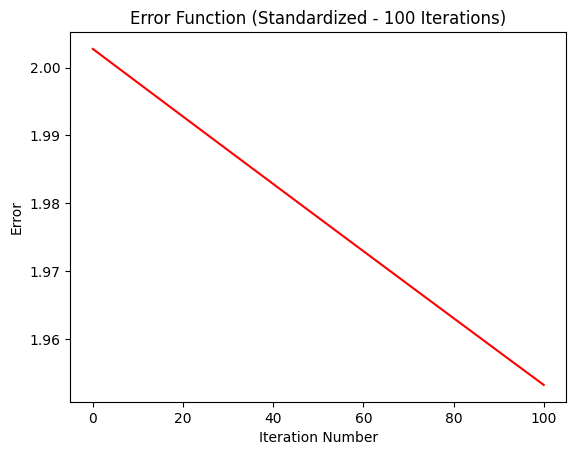

In [15]:
error_points = []

m = -0.5
b = 0
alpha = 0.0001

for i in range(100):
    m = update_grad(m, alpha, m_grad(std_final_marks, m, std_midterm_marks, b, len(std_midterm_marks)))
    b = update_grad(b, alpha, b_grad(std_final_marks, m, std_midterm_marks, b, len(std_midterm_marks)))
    error_points.append(cost_function(std_final_marks, m, std_midterm_marks, b, len(std_midterm_marks)))

plt.xlabel('Iteration Number')
plt.ylabel('Error')
plt.title('Error Function (Standardized - 100 Iterations)')

x_values = np.linspace(0, 100, 100)
plt.plot(x_values, error_points, 'r')  # inital regression line

Updating m and b for 2000 iterations

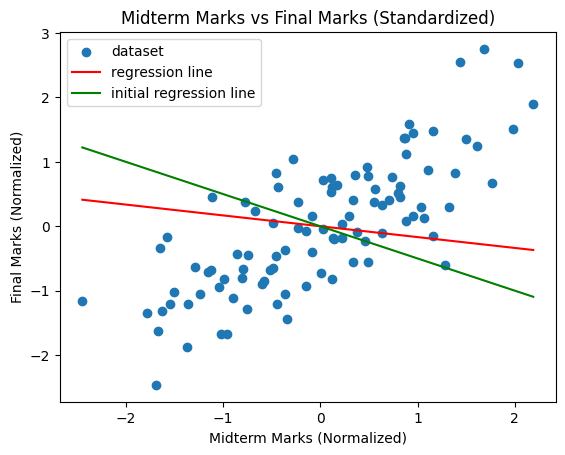

In [16]:
m = -0.5
b = 0
alpha = 0.0001

for i in range(2000):
    m = update_grad(m, alpha, m_grad(std_final_marks, m, std_midterm_marks, b, len(std_midterm_marks)))
    b = update_grad(b, alpha, b_grad(std_final_marks, m, std_midterm_marks, b, len(std_midterm_marks)))
    
plt.scatter(std_midterm_marks, std_final_marks)
plt.xlabel('Midterm Marks (Normalized)')
plt.ylabel('Final Marks (Normalized)')
plt.title('Midterm Marks vs Final Marks (Standardized)')

x_values = np.linspace(min(std_midterm_marks), max(std_midterm_marks), 100)
plt.plot(x_values, x_values * m + b, 'r')  # inital regression line
plt.plot(x_values, x_values * -0.5, 'g')  # inital regression line
plt.legend(["dataset", "regression line", "initial regression line"])

Error graph for the error function for 2000 iterations

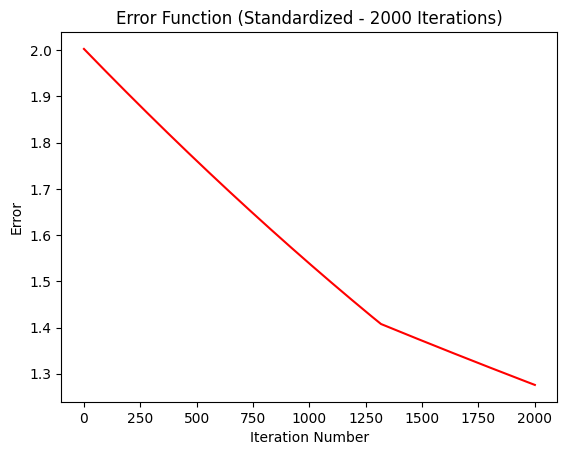

In [33]:
error_points = []

m = -0.5
b = 0
alpha = 0.0001

for i in range(2000):
    m = update_grad(m, alpha, m_grad(std_final_marks, m, std_midterm_marks, b, len(std_midterm_marks)))
    b = update_grad(b, alpha, b_grad(std_final_marks, m, std_midterm_marks, b, len(std_midterm_marks)))
    error_points.append(cost_function(std_final_marks, m, std_midterm_marks, b, len(std_midterm_marks)))


plt.xlabel('Iteration Number')
plt.ylabel('Error')
plt.title('Error Function (Standardized - 2000 Iterations)')

x_values = np.linspace(0, 2000, 2000)
plt.plot(x_values, error_points, 'r')  # inital regression line

Verifying using Sklearn Linear Regression

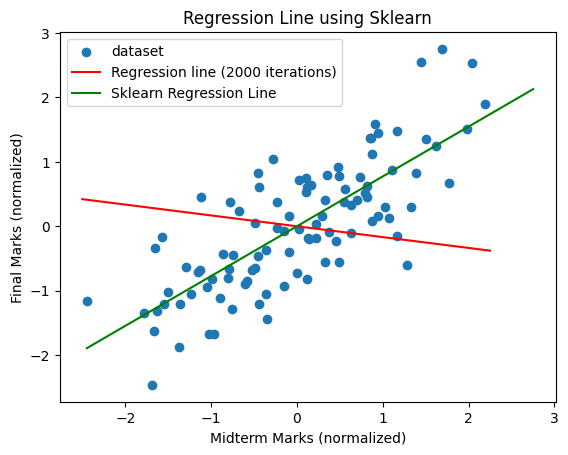

In [18]:
reg = LinearRegression()

prediction_space = np.linspace(min(std_midterm_marks), max(std_final_marks) , 100).reshape(-1, 1)

x = np.array(std_midterm_marks).reshape(-1, 1)
y = np.array(std_final_marks).reshape(-1, 1)

x_values = np.linspace(-2.5, 2.25, 100)


reg.fit(x, y)
y_pred = reg.predict(prediction_space)

plt.scatter(std_midterm_marks, std_final_marks)
plt.xlabel('Midterm Marks (normalized)')
plt.ylabel('Final Marks (normalized)')
plt.title("Regression Line using Sklearn")
plt.plot(x_values, x_values * m + b, 'r')  # inital regression line
plt.plot(prediction_space, y_pred, color='green')
plt.legend(["dataset", "Regression line (2000 iterations)", "Sklearn Regression Line"])

### Q1 : Changing learning rate to 0.1

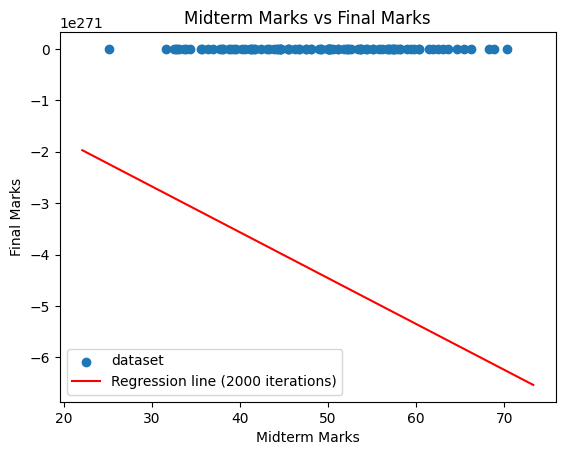

In [19]:
m = -0.5
b = 0
alpha = 0.1

for i in range(100):
    m = update_grad(m, alpha, m_grad(final_marks, m, midterm_marks, b, len(midterm_marks)))
    b = update_grad(b, alpha, b_grad(final_marks, b, midterm_marks, b, len(midterm_marks)))


plt.scatter(midterm_marks, final_marks)
plt.xlabel('Midterm Marks')
plt.ylabel('Final Marks')
plt.title('Midterm Marks vs Final Marks')

x_values = np.linspace(min(midterm_marks) - 3, max(midterm_marks) + 3, 100)
plt.plot(x_values, x_values * m + b, 'r')  # inital regression line
plt.legend(["dataset", "Regression line (2000 iterations)"])

Error Graph

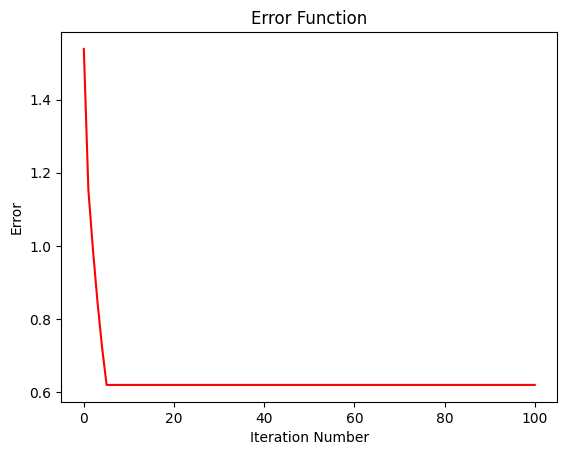

In [28]:
error_points = []

m = -0.5
b = 0
alpha = 0.1

for i in range(100):
    m = update_grad(m, alpha, m_grad(std_final_marks, m, std_midterm_marks, b, len(midterm_marks)))  
    b = update_grad(b, alpha, b_grad(std_final_marks, m, std_midterm_marks, b, len(midterm_marks)))  
    error_points.append(cost_function(std_final_marks, m, std_midterm_marks, b, len(midterm_marks)))  


plt.xlabel('Iteration Number')
plt.ylabel('Error')
plt.title('Error Function')

x_values = np.linspace(0, 100, 100)
plt.plot(x_values, error_points, 'r')  # inital regression line

### Q2: Effect of Standardization

-Standardization helps to keep the prediction model consistent 

-Helps with better convergence 

-Better performance